<a href="https://colab.research.google.com/github/uwaezuokeac/PolynomialLinearRegression/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Position_Salaries.csv to Position_Salaries.csv


In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Position_Salaries.csv']))



In [10]:
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [8]:
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [12]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [13]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Training the Linear Regression model on the whole dataset

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)

In [23]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [24]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

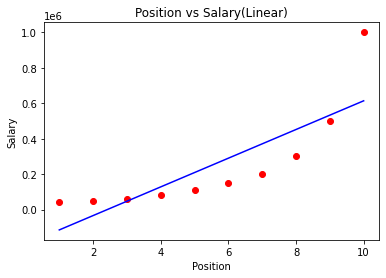

In [30]:
plt.scatter(x,y, color='red')
plt.plot(x,lin_reg.predict(x), color = 'blue',)
plt.title("Position vs Salary(Linear)")
plt.xlabel('Position')
plt.ylabel('Salary')

plt.show()

## Visualising the Polynomial Regression results

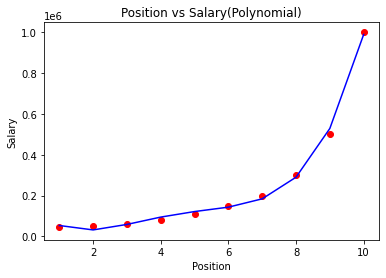

In [32]:
plt.scatter(x,y, color='red')
plt.plot(x,lin_reg2.predict(x_poly), color = 'blue',)
plt.title("Position vs Salary(Polynomial)")
plt.xlabel('Position')
plt.ylabel('Salary')

plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

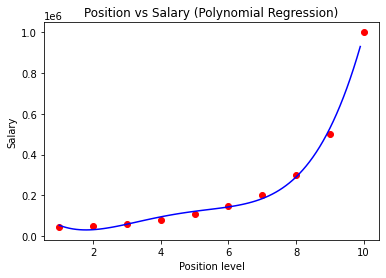

In [34]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Position vs Salary (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [35]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [38]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])